In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pyplot as plt

<b><h3>Exploratory Data Analysis</h3></b>

Classical statistics focuses almost exclusively on inference, a complex set of procedures for drawing conclusions about large populations based on small samples. The scientific discipline of data analysis includes statistic inference as just one component. Exploratory data analysis uses simple plots (eg boxplots, scatterplots) along with summary statistics (mean, median, quantiles, etc) to help paint a picture of a data set.

<b><h4>Elements of Structured Data</h4></b>

Data comes from many sources: sensor measurements, events, text, images, and videos. The Internet of Things (IoT) is spewing out streams of information. Much of this data is unstructured: images are a collection of pixels, with each pixel containing RGB (red, green, blue) color information. Texts are sequences of words and nonword characters, often organized by sections, subsections, and so on. Clickstreams are sequences of actions by a user interacting with an app or a web page. In fact, a major challenge of data science is to harness this torrent of raw data into actionable information. To apply statistical concepts, unstructured raw data must be processed and manipulated into a structured form. One of the commonest forms of structured data is a table with rows and columns - as data might emerge from a relational database or be collected for a study.

There are two basic types of structured data: numeric and categorical. Numeric data comes in two forms: continuous, such as wind speed or time duration and discrete, such as the count of the occurrence of an event. Categorical data takes only a fixed set of values, such as state name. Binary data is an important special case of categorical data that takes on only one of two values such as 0/1, yes/no, or true/false. Another useful type of categorical data is ordinal data in which the categories are ordered; an example of ordinal categories is a numerical rating (1,2,3,4,5 stars).

For the purposes of data analysis and predictive modeling, the data type is important to help determine the type of visual disply, data analysis or statistical model. In fact data science software/libraries such those in Python, use these data types to improve computational performance. More important, the data type for a variable determines how software/libraries will handle computations for that variable.

<b><h3>Rectangular Data</h3></b>

The typical frame of reference for an analysis in data science is a rectangular data object, like a spreadsheet or database table. Rectangular data is the general term for a two-dimensional matrix with rows indicating recores (cases) and columns indicating features (variables). Data doesnt always start in this form: unstrucutred data (eg text) must be processed and manipulated so that it can be represented as a set of features in the rectangular data. Data in relational databases must be extracted and put into a single table for most data analysis and modeling tasks.

<b><h4>Data Frames and Indexes</h4></b>

Traditional database tables have one or more columns designated as an index, essentially a row number. This can vastly improve the efficiency of certain database queries. In Python, with the pandas library, a basic rectangular data structure is a DataFrame object. By default, an automatic integer index is created for DataFrame based on the order of the rows. In pandas, it is also possible to set multilevel/hierarchical indexes to improve the efficiency of certain operations.

<b><h4>Nonrectangular Data Structures</h4></b>

There are other data structures besides rectangular data. 

Time series data records successive measurements of the same variable. It is the raw material for statistical forecastiing methods, and it is also a key component of the data produced by devices - the Internet of Things.

Spatial data structures, which are used in mapping and location analytics, are more complex and varied than rectangular data strucutes. In the object representation, the focus of the data is the object, (eg a house) and its spatial coordinates. The field view, by contrast, focuses on small units of space and the value of a relevant metric (pixel brightness, for example).

Graph (or network) data structures are used to represent physical, social, and abstract relationships. For example, a graph of a social network, such as Facebook or LinkedIn, may represent connections between people on the network. Distribution hubs connected by roads are an example of a physical network. Graph structures are useful for certain types of problems, such as network optimization and recommender systems. 

Each of these data types has its specialized methodology in data science. The focus here however is on rectangular data science, the fundamental building block of predictive modeling.

<b><h3>Estimates of Location</h3></b>

Variables with measured or count data might have thousands of distinct values. A basic step in exploring data is getting a "typical" value for each feature (variable): an estimate of where most of the data is located ie its central tendency. In fact, while the mean is easy to compute, and expedient to use, it may not always be the best measure of a central value. For this reason, statisticians have developed and promoted several alternative estimates to the mean.

Statisticans often use the term estimate for a value calculated from the data at hand, to draw a distinction between what we see from the data and the theoretical true or exact state of affairs. Data scientists are more likely to refer to such a value as a metric. The difference reflects the approach of statistics versus that of data science: accounting for uncertainty lies at the heart of the discipline of statistics, whereas concrete business or organizational objectives are the focus of data science. Hence, statisticians estimate and data scientists measure.

<b><h4>Mean</h4></b>

The most basic estimate of location is the mean, or average value. The mean is the sum of all values divided by the number of values. The formula to compute the mean for a set of n values $x_1,..,x_2,...,x_n$ is:

$Mean$ = $\bar{x}$ = $\frac{\sum_{i=1}^nx_i}{n}$

A variation of the mean is a trimmed mean, which you calculate by dropping a fixed number of sorted values at each end and then taking an average of the remaining values. Representing the sortd values by $x_{(1)},x_{(2)},...,x_{(n)}$ The formula to compute the trimmed mean with $p$ smallest and largest values omitted is:

$Trimmed\; mean$  = $\bar{x}$ = $\frac{\sum_{i=p+1}^{n-p}x_i}{n-2p}$

A trimmed mean eliminates the influence of extreme values. For example, in international diving the top score and bottom score from five judges are dropped, and the final score is the average of the scores from the three remaining judges. This makes it difficult for a single judge to manipulate the score, perhaps to favor their country's contestant. Trimmed means are widely used, and in many cases, are referrable to using the ordinary mean.

Another type of mean is the weighted mean, which you calculate by multiplying each data value $x_i$ by a user-specified weight $w_i$ and dividing their sum by the sum of the weights. The formula for a weighted mean is:

$Weighted\;mean$ = $\bar{x}_w$ = $\frac{\sum_{i=1}^{n}w_ix_i}{\sum_{i=1}^nw_i}$

There are two main motivations for using a weighted mean:

- Some values are intrinsically more variable than others, and highly variable observations are given a lower weight. For example, if we are taking the average from multiple sensors and one of the sensors is less accurate, then we might downweight the data from that sensor.

- The data collected does not equally represent the different groups that we are interested in measuring. For example, because of the way an online experiment was conducted, we may not have a set of data that accurately reflects all groups in the user base. To correct that, we can give a higher weight to the values from the groups that were underrepresented.

<b><h4>Median and Robust Estimates</h4></b>

The median is the middle number on a sorted list of the data. If there is an even number of data values, the middle value is one that is not actually in the data set, but rather the average of the two values that divide the sorted data into upper and lower halves. Compared to the mean, which uses all observations, the median depends only on the values in the center of the sorted data. While this might seem to be a disadvantage, since the mean is much more sensitive to the data, there are many instances where the median is a better metric for location. Let's say we want to look at typical household incomes in neighborhoods around Lake Washington in Seattle. In comparing the wealthy versus a middle-class neighborhood, using the mean would produce very different results if say a billionaire lives in the wealthy neighborhood. If we use the median it won't matter how rich the billionaire is- the position of the middle observation will remain the same.

For the same reasons that one uses a weighted mean, it is also possible to compute a weighted median. As with the median, we first sort the data, although each data value has an associated weight. Instead of the middle number, the weighted median is a value such that the sum of the weights is equal for the lower and upper halves of the sorted list. Like the median, the weighted median is robust to outliers.

<b><h4>Outliers</h4></b>

The median is referred to as a robust estimate of location since it is not influenced by outlier (extreme cases) that could skew the results. An outlier is any value that is very distant from the other values in the data set. Being an outlier in itself does not make a data value invalid or erroneous. Still, outliers are often the result of data errors such as mixing data of different units or bad readings from a sensor. When outliers are the result of bad data, the mean will result in a poor estimate of location, while the median will still be valid. 

In any case, outliers should be identified and are usually worthy of further investigation. In contrast to typical data analysis, where outliers are sometimes informative and sometimes a nuissance, in anomaly detection the points of interest are the outliers, and the greater mass of data serves primarily to define the "normal" against which anomalies are measured.

The median is not the only robust estimate of location. In fact, a trimmed mean is widely used to avoid the influence of outliers. For example, trimming the bottom and top 10% of the data will provide protection against outliers in all but the smallest data sets. The trimmed mean can be thought of as a compromise between the median and the mean: it is robust to extreme values in the data, but uses more data to calculate the estimate for location.

<b><h4>Example: Location Estimates of Population and Murder Rates</h4></b>

To compute the mean and median in Python, we can use the pandas methods of the data frame. The trimmed mean requires the trim_mean() function in scipy.stats.

In [3]:
state = pd.read_csv('../data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [4]:
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [5]:
state.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Population,50.0,6162876.300,6.848235e+06,563626.0,1833004.250,4436369.5,6680312.25,37253956.0
Murder.Rate,50.0,4.066,1.915736e+00,0.9,2.425,4.0,5.55,10.3


In [6]:
state['Population'].mean()

6162876.3

In [7]:
trim_mean(state['Population'], 0.1) # trim the top and bottom 10% of data


4783697.125

In [8]:
state['Population'].median()

4436369.5

The mean is bigger than the trimmed mean, which is bigger than the median. Weighted mean is available with NumPy. For weighted median, we can use a specialized package wquantiles.



In [9]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [10]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

In [11]:
state['Murder.Rate'].multiply(state['Population']).sum() / state['Population'].sum() # weighted murder rate

4.445833981123393

<b><h3>Estimates of Variability</h3></b>

Location is just one dimension in summarizing a feature. A second dimension, variability, also referred to as dispersion, measures whether the data values are tightly clustered or spread out. At the heart of statistics lies variablilty : measuring it, reducing it, distinguishing random from real variability, identifying the various sources of real variability, and making decisions in the presence of it.

<b><h4>Standard Deviation and Related Estimates</h4></b>

The most widely used estimates of variation are based on the differences, or deviations, between the estimate of location and the observed data. These deviations tell us how dispersed the data is around the central value. One way to measure variability is to estimate a typical value for these deviations. Averaging the deviations themselves would not tell us much, the negative deviations offset the positive ones. In fact, the sum of the deviations from the mean is precisely zero. Instead, a simple approach is to take the average of the absolute value of the deviations from the mean.
This is known as the mean absoulte deviation and it is computed with the formula:

Mean absolute deviation = $\frac{\sum_{i=1}^n|x_i-\bar{x}|}{n}$ wehre $\bar{x}$ is the sample mean

The best-known estimates of variability are the variance and the standard deviation, which are based on squared deviations. The variance is an average of the squared deviations, and the standard deviation is the square root of the variance.

Variance = $s^2$  = $\frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}$

Standard deviation = s = $\sqrt{Variance}$

The standard deviation is much easier to interpret than the variance sincd it is on the same scale as the original data. Still, with its more complicated and less intuitive formula, it might seem peculiar that the standard deviation is preferred in statistics over the mean absolute deviation (they are both on the same scale as the original data). It owes its preeminence to statistical theory: mathematically, working with squared values is much more convenient than absolute values, especially for statistical models.

Neither the variance, the standard deviation, or the mean absolute deviation is robust to outliers and extreme values. The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations.

A robust estimate of variability is the median absolute deviation from the median or MAD:

Median absolute deviation = Median $(|x_1 - m|, |x_2 - m|, ..., |x_N - m|)$ where m is the median. Like the median, the MAD is not influenced by extreme values. It is also possible to compute a trimmed standard deviation analogous to the trimmed mean.

The variance, the standard deviation, the mean absolute deviation, and the median absolute deviation from the median are not equivalent estimates, even in the case where the data comes from a normal distribution. In fact, the standard deviation is always greater than the mean absolute deviation, which itself is greater than the median absolute deviation. Sometimes, the median absolute deviation is multiplied by a constant scaling factor to put the MAD on the same scale as the standard deviation in the case of a normal distribution. The commonly used factor of 1.4826 means that 50% of the normal distribution fall within the range +=MAD.

<b><h5>Degrees of Freedom, n or n-1</h5></b>

The discussion of why we have n-1 in the denominator of the variance formula, instead of n, leads to the concept of degrees of freedom. This distinction is importnat since n is generally large enough that it won't make much difference whether you divide by n or n-1. The division by n-1 however, is based on the premise that you want to make estimates about a population, based on a smaple. 

If you use the intuitive denominator of n in the variance formula, you will understimate the true value of the variance and the standard deviation in the population. This is referred to as the biased estimate. However, if you divide by n-1 instead of n, the variance becomes the unbiased estimate. In this case, there are n-1 degrees of freedom since there is one constraint: the standard deviation depends on calculating the sample mean.

<b><h4>Estimates Based on Percentiles</h4></b>

A different approach to estimating dispersion is based on looking at the spread of the sorte data. Statistics based on sorted (ranked) data are referred to as order statistics. The most basic measure is the range: the difference between the largest and smallest numbers. The minimum and maximum values themselves are useful to know and are helpful in identifying outliers, but the range is extremely sensitive to outliers and not very useful as a general measure of dispersion in the data. To avoid the sensitivity to outliers, we can look at the range of the data after dropping values from each end. Formally, these types of estimates are based on differences between percentiles. In a  data set, the Pth percentile is a value such that at least P percent of the values take on this value or less and at least (100-P) percent of the values take on this value or more. For example, to find the 80th percentile, sort the data. Then starting with the smallest value, proceed 80% of the way to the largest value. Note that the median is the same thing as the 50th percentile. The percentile is essentially the same as a quantile, with quantiles indexed by fractions (so the .8 quantile is the same as the 80th percentile).

A common measurement of variability is the difference between the 25th percentile and the 75th percentile, called the interquartile range or (IQR). If we have an even number of data (n is even), then the percentile is ambiguous. In fact, we could take on any value between the order statistics $x_(j)$ and $x_(j+1)$ where j satisfies:

100* $\frac{j}{n}$ $\leq$ P < 100 * $\frac{j+1}{n}$

Finally, the percentile is the weighted average:

Percentile(P) = (1-w)$x_{(j)}$ + $wx_{(j+1)}$   for some weitht w between 0 and 1

<b><h4>Example: Variability Estimates of State Population</h4></b>

The pandas data frame provides methods for calculating standard deviation and quantiles. Using the quantiles() function, we can easily determine the IQR. For the robust MAD, we use the function robust.scale.mad from statsmodels package:

In [12]:
state['Population'].std()

6848235.347401142

In [13]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

In [14]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [15]:
abs(state['Population'] - state['Population'].median()).median()/ 0.6744897501960817

3849876.1459979336

<b><h3>Exploring the Data Distribution</h3></b>

Each of the estimates so far sums the data in a single number to describe the location or variability of the data. It is also useful to explore how the data is distributed overall.

<b><h4>Percentiles and Boxplots</h4></b>

Percentiles are also valuable for summarizing the entire distribution. It is common to report the quartiles (25th,50th,75th percentiles) and the deciles (10th, 20th, ..., 90th percentiles). Percentiles are especially valuable for summarizing the tails (the outer range) of the distribution. Boxplots are based on quantiles and give a quick way to visualize the distribution of data.

In [16]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [17]:
state['Population'].quantile([0.05, 0.25, 0.5, 0.75,0.95])

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64

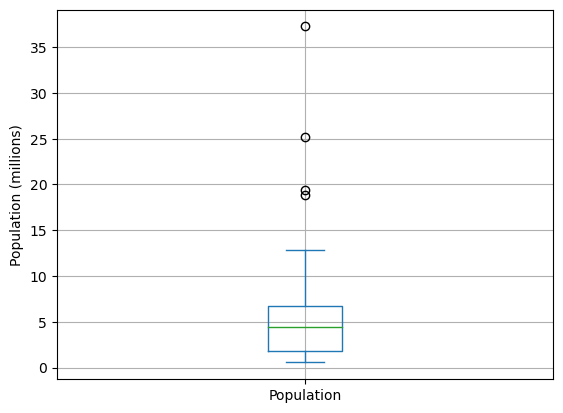

In [18]:
ax = (state['Population']/1_000_000).plot.box() # _ for , between numbers who knew
ax.set_ylabel('Population (millions)')
ax.grid('both', 'both')


The top and bottom of the box are the 75th and 25th percentiles, respectively. The median is shown by the horizontal line in the box. The vertical lines known as whiskers, and the extend from the top and bottom of the box to indicate the range of the bulk of the data. The whiskers extend to the furthest point beyond the box, except it will not go beyond 1.5 times the IQR. Any data outside of the whiskers is plotted as single points or circles (often considered outliers).

In [19]:
state['Population'].max()

37253956

<b><h4>Frequency Tables and Histograms</h4></b>

A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment. The function pandas.cut() creates a series that maps the values into the segments. Using the method value_counts(), we get the frequency table.

In [20]:
binnedPopulation = pd.cut(state['Population'], 10) # create 10 linear cuts between the min and max
binnedPopulation.head(7)

0      (4232659.0, 7901692.0]
1      (526935.67, 4232659.0]
2      (4232659.0, 7901692.0]
3      (526935.67, 4232659.0]
4    (33584923.0, 37253956.0]
5      (4232659.0, 7901692.0]
6      (526935.67, 4232659.0]
Name: Population, dtype: category
Categories (10, interval[float64, right]): [(526935.67, 4232659.0] < (4232659.0, 7901692.0] < (7901692.0, 11570725.0] < (11570725.0, 15239758.0] ... (22577824.0, 26246857.0] < (26246857.0, 29915890.0] < (29915890.0, 33584923.0] < (33584923.0, 37253956.0]]

In [21]:
binnedPopulation.value_counts() # number of data points in each category, value_counts() sorts in descending order

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [22]:
# name from Population to binnedPopulation before concat to avoid confusing with existing Population column
binnedPopulation.name = 'binnedPopulation' 
df = pd.concat([state, binnedPopulation], axis=1)  # show the bin each state belongs to; use existing index overlaps
df.sort_values(by='Population').head() 

,State,Population,Murder.Rate,Abbreviation,binnedPopulation
49,Wyoming,563626,2.7,WY,"(526935.67, 4232659.0]"
44,Vermont,625741,1.6,VT,"(526935.67, 4232659.0]"
33,North Dakota,672591,3.0,ND,"(526935.67, 4232659.0]"
1,Alaska,710231,5.6,AK,"(526935.67, 4232659.0]"
40,South Dakota,814180,2.3,SD,"(526935.67, 4232659.0]"


The least populous state is Wyoming, with 563,626 people, and the most populous is California, with 37,253,956 people. This gives us a range 37,253,956 - 563,626 = 36,690,330, which we must divide up into equal size bins - here 10 bins. With 10 equal size bins, each bin will have a width of 3,669,033, so the first bin will span from 563,626 to 4,232,658. By contrast, the top bin, 33,584,923 to 37,253,956, has only one state: California. It is important to include the empty bins; the fact that there are no values in those bins is useful information. It can also be useful to experiment with different bin sizes. If they are too large, important features of the distribution can be obscured. If they are too small, the result is too granular, and the ability to see the bigger picture is lost.

In [23]:
groups = []
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append(
        {
            'BinRange': group,
            'Count' : len(subset),
            'States': ','.join(subset.Abbreviation) # iterate over series to yield list of strings sep by ','
        }
    )
pd.DataFrame(groups).head()

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"AK,AR,CT,DE,HI,ID,IA,KS,ME,MS,MT,NE,NV,NH,NM,N..."
1,"(4232659.0, 7901692.0]",14,"AL,AZ,CO,IN,KY,LA,MD,MA,MN,MO,SC,TN,WA,WI"
2,"(7901692.0, 11570725.0]",6,"GA,MI,NJ,NC,OH,VA"
3,"(11570725.0, 15239758.0]",2,"IL,PA"
4,"(15239758.0, 18908791.0]",1,FL


Both frequency tables and percentiles summarize the data by creating bins. In general, quartiles and deciles will have the same count in each bin (equal-count bins), but the bin sizes will be different. The frequency table, by contrast, will have different counts in the bins (equal-size bins), and the bin sizes will be the same.

A histogram is a way to visualize a frequency table, with bins on the x-axis and the data count on the y-axis. For example, in the frequency table above, the bin centered at 10 million runs from roughly 8 million to 12 million (index (7901692.0, 11570725.0] ), and there are six states in that bin. To create a histogram for the frequency table above, pandas supports histograms for dataframes with the DataFrame.plot.hist() method. Use the keyword argument bins to define the number of bins. The various plot methods return an axis object that allows further fine-tuning of the visualization using Matplotlib.

Text(0.5, 0, 'Population (millions)')

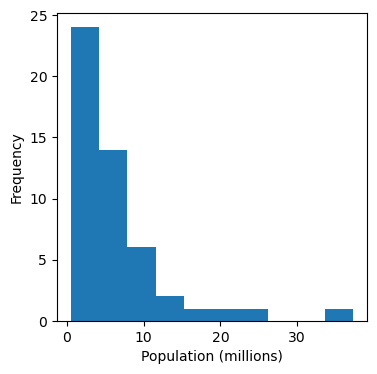

In [24]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4,4))
ax.set_xlabel('Population (millions)')

In general, histograms are plotted such that:
- Empty bins are included in the graph.
- Bins are of equal width.
- The number of bins (or, equivalently bin size) is up to the user
- Bars are contiguous - no empty space shows between bars, unless there is an empty bin.

In statistical theory, location and variability are referred to as the first and second moments of a distribution. The third and fourth moments are called skewness and kurtosis. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values. Generally, metrics are not used to measure skewness and kurtosis, instead, these are discovered through visual displays.

<b><h4>Density Plots and Estimates</h4></b>

Related to the histogram is a density plot, which shows the distribution of data values as a continuous line. A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a <em>kernel density estimate</em>. pandas provides a density() method to create a density plot. Use the argument bw_method to control the smoothness of the density curve.

Text(0.5, 0, 'Murder Rate (per 100,000)')

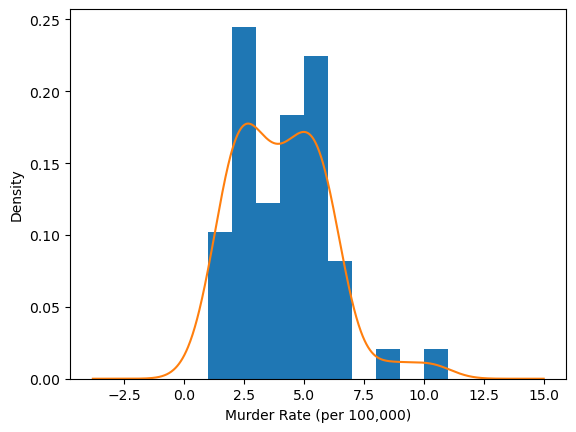

In [25]:
ax = state['Murder.Rate'].plot.hist(density=True,  bins=range(1,12)) # first create histogram
state['Murder.Rate'].plot.density(ax=ax) # superimpose density on same axis
ax.set_xlabel('Murder Rate (per 100,000)')

A key distinction between density plots and histograms is the scale of the y-axis: a density plot coresponds to plotting a histogram as a proportion rather than counts (in python you specify this using the argument desity=True). Note that the total area under the density curve = 1, and instead of counts in bins, you calculate the area under the curve between any two points on the x-axis, which correspond to the proportion of the distribution lying between those two points.

<b><h3>Exploring Binary and Categorical Data </h3></b>

For categorical data, simple proportions or percentages tell the story of the data. Getting a summary of a binary variable or a categoorical variable with a few categories is a fairly easy matter: w just figure out the proportion of 1s, or the proportions of the important categories.

Bar charts, are a common visual tool for displaying a single categorical variable. Categories are listed on the x-axis, and frequencies or proportions on the y-axis. In pandas. we use the pandas.DataFrame.plot.bar() to create bar charts.

Note that a bar chart resembles a histogram; in a bar chart the x-axis represent different categories of a factor variable, while in a histogram the x-axis represents values of a single (binned) variable on a numeric scale. In a histogram, the bars are typically shown touching each other, with gaps indicating values that did not occur in the data. In a bar chart, the bars are shown separate from one another. Frequency tables (on which histograms are based), implicitly converts the numeric data to an ordered factor. In this sense, histograms and bar charts are similar, except that the categories on the x-axis in the bar charts are not ordered. Converting numeric data to categorical data is an important and widely used step in data analysis since it reduces the complexity (and size) of the data. This aids in the discovery of relationships between features, particularly at the initial stages of an analysis.

In [26]:
dfw = pd.read_csv('../data/dfw_airline.csv') # delayed flights by cause of delay at Dallas / Fort Worth Airport
dfw.head() # factors: carrier control, air traffic control system (ATC), weather, security, late inbound aircraft

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

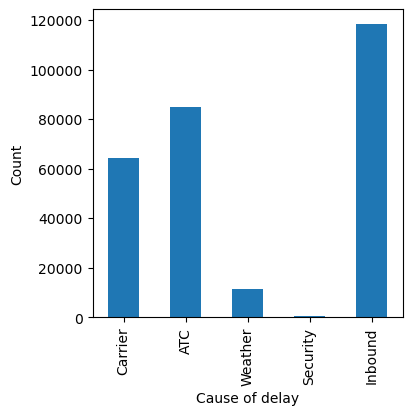

In [27]:
ax = dfw.transpose().plot.bar(figsize=(4,4), legend=False) # Transpose column names to index for x-axis
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

<b><h4>Mode</h4></b>

The mode is the value- or values in the case of a tie- that appears most often in the data. For example, the mode of the cause of delay at Dallas / Fort Worth airport (data frame above) is "Inbound". As an example, in most parts of Ghana, the mode for religious preference would be Christian. The mode is a simple summary statistic for categorical data, and it is generally not used for numeric data.

<b><h4>Expected Value</h4></b>

A special type of categorical data is data in which the categories represent or can be mapped to discrete values on the same scale. A marketer for a new cloud technology, for example, offers two levels of service, one priced at $300/month and another at $50/month. The marketer offers free webinars to generate leads, and the firm figures that 5% of the attendees will sign up for the $300 service, 15% will sign up for the $50 service, and 80% wil not sign up for anything. This data can be summed up, for financial purposes, in a single "expected value", which is a form of weighted mean, in which the weights are probabilities. The expected value is calculated as follows:
1. Multiply each outcome by its probability of occurrence.
2. Sum these values

In the cloud service example, the expected value of a webinar attendee is thus $22.50 per month, calculated as:

EV = (0.05)(300) + (0.15)(50) + (0.80)(0) = 22.5

The expected value is really a form of weighted mean: it adds the ideas of future expectations and probability weights, often based on subjective judgement. Expected value is a fundamental concept in business valuation and capital budgeting - for example, the expected value of profits from a new acquistion, or the expected cost savings from new patient management software at a clinic.

<b><h4>Probability</h4></b>

Sports and games are more often expressed as odds, which are readily convertible to probabilities (if the odds of a team will win are 2 to 1, its probability of winning is 2/(2+1) = 2/3). For our purposes, the probability that an event will happen is the proportion of times it will occur if the situation could be repeated over and over, countless times.

<b><h3>Correlation</h3></b>

Exploratory data analysis in many modeling projects involve examining correlation among predictors, and between predictors and a target variable. Variables X and Y (each with measured data) are said to be positively correlated if high values of X go with high values of Y, and low values of X go with low values of Y. If high values of X go with low values of Y, and vice versa, the variables are negatively correlated.

Consider these two variables, perfectly correlated in the sense that each goes from low to high:

v1 : {1,2,3}

v2 : {4,5,6}

The vector sum of products is 1·4 + 2·5 + 3·6 = 32. Try shuffling one of them and recalculating - the vector sum of products will never be higher than 32. So this sum of products could be used as a metric, that is the observed sum of 32 could be compared to lots of random shufflings. Values produced by this metric, though, are not that meaningful, except by reference to the resampling distribution.

More useful is a standardized variant: the correlation coefficient, which gives an estimate of the correlation between two variables that always lies on the same scale. To compute Pearsons's correlation coefficient, we multiply deviations from the mean for variable 1 times those for variable 2, and divide by the product of the standard deviations:

r = $\frac{\sum_{i=1}^n(x_i - \bar x)(y_i - \bar y)}{(n-1)s_xs_y}$


In [28]:
sp500_sym = pd.read_csv('../data/sp500_sectors.csv')
sp500_px = pd.read_csv('../data/sp500_data.csv.gz', index_col=0)

In [29]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [30]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [31]:
# telecommunications sector symbols
telecomSymbols =  sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']
telecomSymbols

332       T
333     CTL
334     FTR
335      VZ
336    LVLT
Name: symbol, dtype: object

In [32]:
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [33]:
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


The correlation coefficient always lies between +1 (perfect positive correlation) and -1 (perfect negative correlation); 0 indicates no correlation.

Variables can have an association that is not linear, in which case the correlation coefficient may not be a useful metric. The relationship between tax rates and revenue raised is an example: as tax rates increase from zero, the revenue raised also increases. However, once tax rates reach a high level and approach 100%, tax avoidance increases and tax revenue actually declines.

A table of correlations like the table above is commonly plotted to visually display the relationship between multiple variables. In Python, we can visualize correlation matrices using heatmaps.

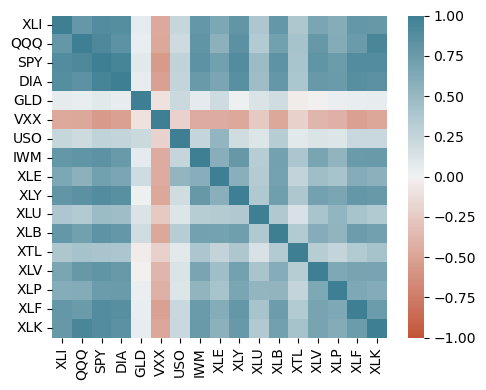

In [34]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20,220, as_cmap=True), ax=ax)
plt.tight_layout()

Like the mean and standard deviation, the correlation coefficient is sensitive to outliers in the data. Software packages offer robust alternatives to the classical correlation coefficient. The methods in the scikit-learn module sklearn.covariance() implements a variety of approaches. Statisticians proposed other types of correlation coefficients such as Spearman's or Kendall's tau. These are correlation coefficients based on the rank of the data. Since they work with ranks rather than values, these estimates are robust to outliers and can handle certain types of nonlinearities. However, data scientists can generally stick to Pearson's correlation coefficient, and its robust alternatives, for exploratory analysis. The appeal of rank-based estimates is mostly for smaller data sets and specific hypothesis tests.

The following code shows us the strength of the correlation using ellipses.

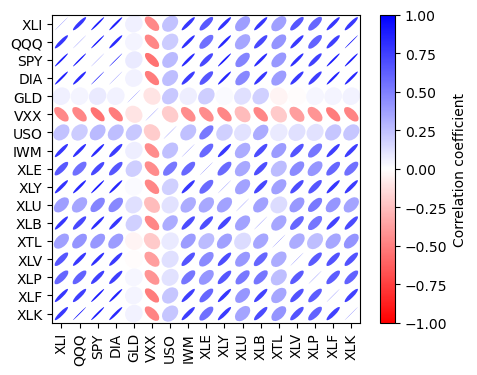

In [51]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    M = np.array(data)

    if not M.ndim == 2:
        raise ValueError("data must be 2D array")
    fig, ax = plt.subplots(1,1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2,-1).T

    # set the relative sizes of the major / minor axes according to the strength of positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h =  1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths = w, heights=h, angles = a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    
    ax.add_collection(ec)
    
    # if data is a DataFrame, use the row / column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)
    
    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5,4), cmap='bwr_r')
cb = fig.colorbar(m,ax=ax)
cb.set_label('Correlation coefficient')

# plt.tight_layout()

<b><h4>Scatterplots</h4></b>

The standard way to visualize the relationship between two measured data variables is with a scatterplot. The x-axis represents one variable and the y-axis another, and each point on the graph is a record. We can use the pandas scatter() method.

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


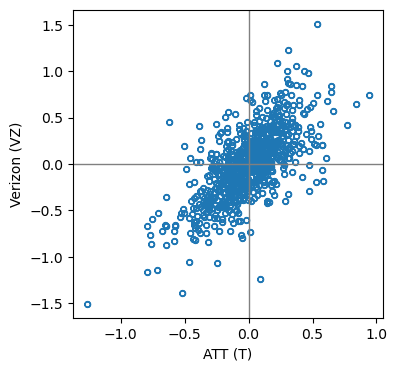

In [ ]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4,4), marker='$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)   # horizontal line
ax.axvline(0, color='grey', lw=1)   # vertical line

The returns have a positive relationship: while they cluster around zero, on most days, the stocks go up or down in tandem (upper-right and lower-left quadrants). There are fewer days where one stock goes down significantly while the other stock goes up, or vice versa (lower-right and upper-left quadrants).

<b><h3>Exploring Two or More Variables</h3></b>

Estimators like mean and variance look at variables one at a time (univariate analysis). Correlation analysis is an important method that compares two variables (bivariate analysis). Multivariate analysis concerns estimates and plots that look at more than two variables.

Like univariate analysis, bivariate analysis involves both computing summary statistics and producing visual displays. The appropriate type of bivariate or multivariate analysis depends on the nature of the data: numeric versus categorical.

<b><h4>Hexagonal Binning and Contours (Plotting Numeric Versus Numeric Data)</h4></b>

Scatterplots are fine when there is a relatively small number of data values. For data sets with hundreds of thousands or millions of records, a scatterplot will be too dense, so we need a different way to visualize the relationship. 

In [ ]:
# kc_tax contains the tax-assessed values for residential properties in King County, Washington
kc_tax = pd.read_csv('../data/kc_tax.csv.gz')

In [ ]:
# filter expensive and very small or large residencies 
kc_tax0 = kc_tax.loc[
    (kc_tax.TaxAssessedValue < 750000) &    # rows with moderate prices ANC
    (kc_tax.SqFtTotLiving > 100) &          # rows where square ft is not too small  AND
    (kc_tax.SqFtTotLiving < 3500), :        # rows where square ft is not too big AND, all columns
]

In [ ]:
kc_tax0.shape

(432693, 3)

For hexagonal binning plots, instead of plotting points, which would appear as a monolithic dark cloud (due to the large number of records), we grouped the records into hexagonal bins and plotted the hexagons with a color indicating the number of records in that bin. In Python, hexagonal binning plots are readily available using the pandas data frame method hexbin. We specify the hexagon size via the gridsize keyword argument (we can provide a single integer for the x-axis bins and pandas will calculate the corresponding y-axis bins or we can provide a tuple).

Text(0, 0.5, 'Tax-Assesed Value')

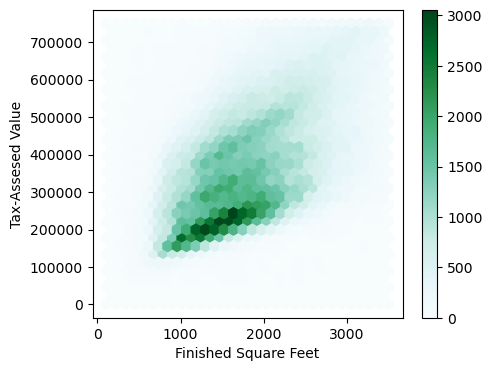

In [ ]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assesed Value')

We can also use countours overlaid onto a scatterplot to visualize the relationship between two numeric variables. The contours are essentially a topographical map to two variables, each contour banda represents a specific density of points, increasing as one nears a peak. The seabornn kdeplot function in Python creates a contour plot.

Heat maps, hexagonal binning, and contour plots all give a visual representation of a two-dimensional density. In this way, they are natural analogs to histograms and density plots

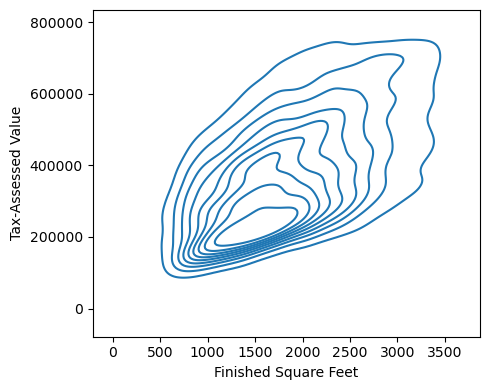

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
ax  = sns.kdeplot(kc_tax0.sample(20000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')
plt.tight_layout()

<b><h4>Two Categorical Variables</h4></b>

A useful way to summarize two categorical variables is a contingency table - a table of counts by category. This is essentially a pivot_table in Python with aggregation function as 'size'. In order for margins=True to work however, we need to provide a lambda function that returns the size of the grouped data because somehow the margins function can't call 'size'. We could also have our pivot_table display percentages.

In [ ]:
lc_loans = pd.read_csv('../data/lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [ ]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc= lambda x: len(x), margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [ ]:
# Calculating the percentages is a bit more involved
df = crosstab.loc['A':'G', :].copy()  # indexing returns a view not a copy so we need to explicitly copy
df.loc[:, 'Charged Off': 'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0) # fractions in feature cols
df['All'] = df['All'] / sum(df['All']) # fractions in All column
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [ ]:
df.All.sum()

1.0

<b><h4>Categorical and Numeric Data</h4></b>

Boxplots are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable. In the example below we have numeric data in percentage of delays caused by carrier delays, pct_carrier_delay and we want to make boxplots by the different airlines. We use the pandas.DataFrame.boxplot() method which takes the by argument and splits the data set into groups and creates individual boxplots. Somehow, doing the same thing with pandas.DataFrame.plot.box() and providing the by argument and the column argument will return a Series, not an axes object. Even with the boxplot() function, we can plot all columns by not providing the column keyword but that will return an nd-array of axes.

In [ ]:
airline_stats = pd.read_csv('../data/airline_stats.csv')
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


Text(0.5, 0.98, '')

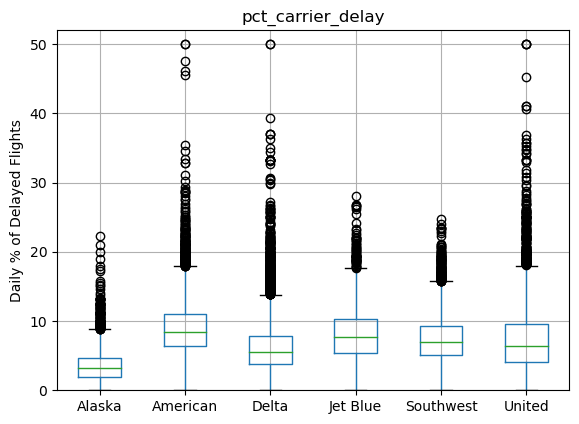

In [ ]:
# using .plot.box() with the by and column keywords somehow yields a Series, visualizes okay but cant set labels, 
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
ax.set_ylim([0,52])
plt.suptitle('')


Alaska airlines has the fewest delays (its 25th percentile, mean and 75th perdentile is lower than the rest). American airlines has the most delays; the lower quantile for American airlines is higher than the upper quantile for Alaska.

A violin plot is an enhancement to the boxplot and plots the density estimate with the density on the y-axis. The density is mirrored and flipped over, and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that arent perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data. Violin plots are available with the violinplot method of the seaborn package.

Text(0, 0.5, 'Daily % of Delayed Flights')

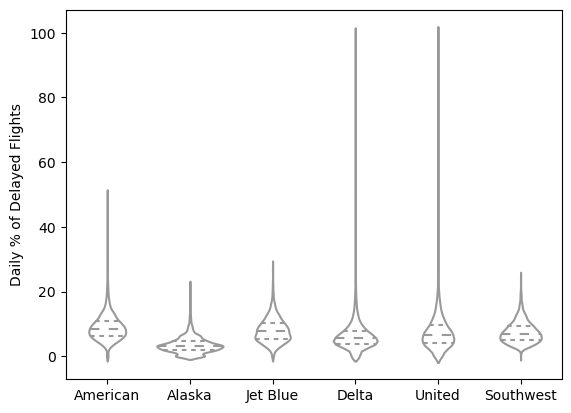

In [ ]:
ax = sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
 inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

The violin plot shows a concentration in the distribution near zero for Alaska and to a lesser extent, Delta. This phenomenon is not as obvious in the boxplot. 

<b><h4>Visualizing Multiple Variables</h4></b>

The types of charts used to compare two variables - scatterplots, hexagonal binning, and boxplots -are readily extended to more variables through the notioning of conditioning.

We can use sns.FacetGrid() to produce visualize multiple variables.

- Use the arguments col and row to specify the conditioning variables. For a single conditioning variable, use col together with col_wrap to wrap the faceted graphs into multiple rows.
- The map() method calls the hexbin() function with subsets of the original data set for the different values of the conditioniing variables

- In the example below, the conditioning variable is the ZipCode column which has four unique values. Since we only have one conditioning variable, we provide it to the FacetGrid() function as the col keyword argument and also provide the col_wrap set to 2, to have two rows and since we have four unique zip codes this comes to 2 cols 2 rows.

- We provide the hexbin function, SqFtTotLiving and TaxAssessedValue to the map() method of FacetGrid object to map the provided arguments to the hexbin() user defined function. This will map the x,y columsn to the hexbin function  which will call plt.hexbin(). This effectively plots a hexagonal binning plot of SqFtTotLiving to TaxAssessedValue for each unique value in the conditioning variable, ZipCode.

In [ ]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0
...,...,...,...
498049,346000.0,1430,98105.0
498050,463000.0,1610,98105.0
498051,553000.0,1580,98105.0
498052,571000.0,1840,98105.0


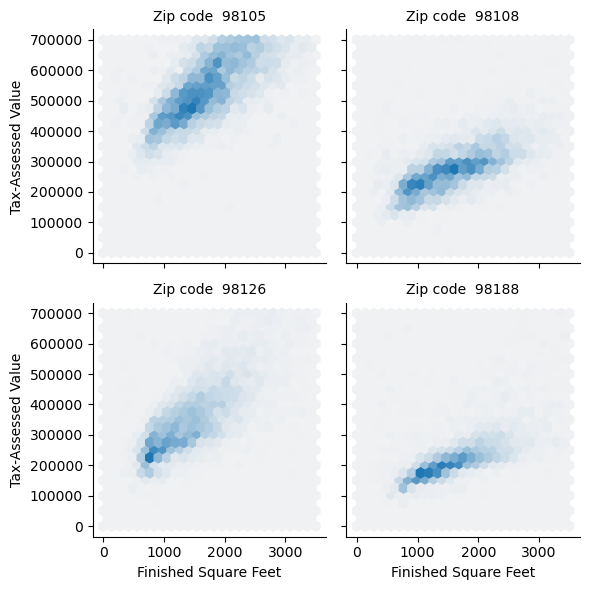

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0,3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name: .0f}')

In [ ]:
kc_tax_zip.ZipCode.unique()

array([98108., 98126., 98188., 98105.])